In [1]:
## 911 Calls Data Capstone Project
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
%matplotlib inline 

In [3]:
df = pd.read_csv('911.csv') # Reading the dataset we have

In [4]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [5]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [6]:
#Check top 5 zipcodes for 911 calls 
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

In [7]:
#Top 5 towns for 911 calls 
df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

In [8]:
#Create a reason column for the title to sort the type of emergency
df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])

In [9]:
df['Reason'].head()

0     EMS
1     EMS
2    Fire
3     EMS
4     EMS
Name: Reason, dtype: object

In [10]:
# Most Common reason for calling 911 
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

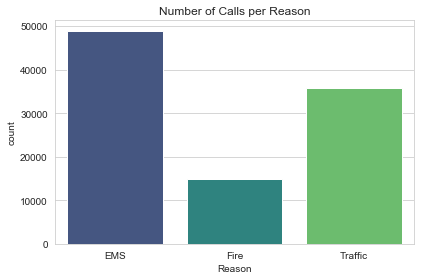

In [11]:
plt.title('Number of Calls per Reason')
sns.countplot(df['Reason'], palette = 'viridis')
plt.tight_layout()

In [12]:
#Converting timestamps to DateTime Object
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [28]:
time = df['timeStamp'].iloc[0] 
#Creating a variable that stores the value of time.
df['Hour']= df['timeStamp'].apply(lambda time: time.hour)
df['Month']= df['timeStamp'].apply(lambda time: time.month)
df['Day of Week']= df['timeStamp'].apply(lambda time: time.dayofweek)
df.head() 
# As we see the day of week is a number, for better data visual
# we change it to 

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,3


In [29]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [30]:
df['Day of Week'] = df['Day of Week'].map(dmap)

In [31]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu


In [32]:
#In the table above we see that the Day of Week column number values has 
# changed to the respective day of the week.

Text(0.5, 1.0, 'Number of calls per Day of week')

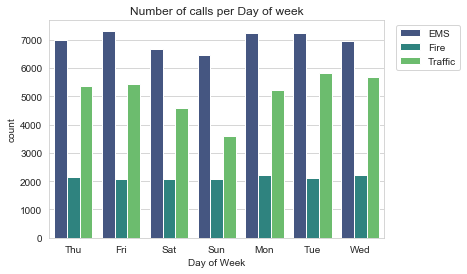

In [39]:
#Let's plot the data 
sns.countplot(x = 'Day of Week',data = df,hue = 'Reason',palette = 'viridis')
plt.legend(bbox_to_anchor= (1.02,1), loc =2 )
plt.title('Number of calls per Day of week')


Text(0.5, 1.0, 'Number of 911 Calls per month')

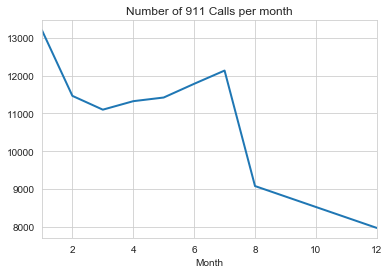

In [51]:
byMonth = df.groupby('Month').count()
byMonth['lat'].plot(kind = 'line',lw = 2)
plt.title('Number of 911 Calls per month')

Text(0.5, 1.0, 'Number of Call per TWP')

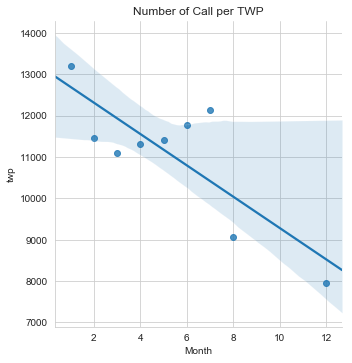

In [53]:
sns.lmplot(x='Month',y='twp',data = byMonth.reset_index())
plt.title('Number of Call per TWP')

In [54]:
# the points outside the shaded regions are the errors we have in our data
# or we can call them the outliers

In [57]:
df['Date']= df['timeStamp'].apply(lambda t: t.date())
# We create another column that retrieves the dates from our dataset

In [58]:
df['Date'].head()

0    2015-12-10
1    2015-12-10
2    2015-12-10
3    2015-12-10
4    2015-12-10
Name: Date, dtype: object

Text(0.5, 1.0, 'Number of Calls VS Date')

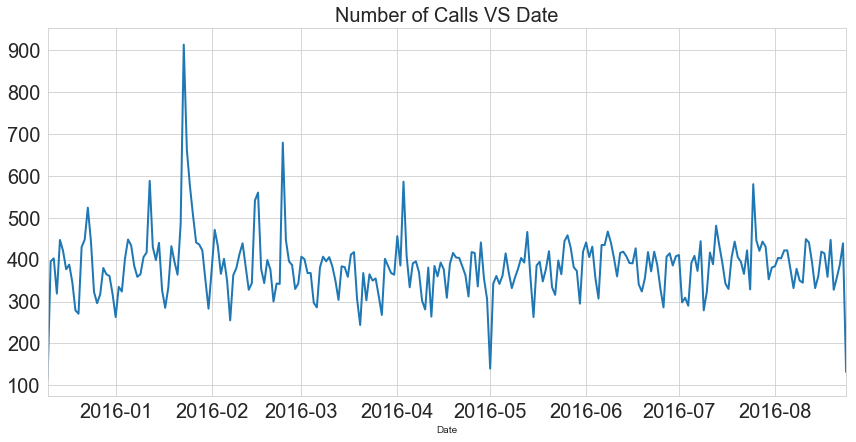

In [88]:
df.groupby('Date').count()['lat'].plot(lw=2, figsize = (12,6), fontsize = 20)
plt.tight_layout()
plt.title('Number of Calls VS Date',fontsize= 20)

Text(0.5, 1.0, 'Number of Calls for Traffic Vs DATE')

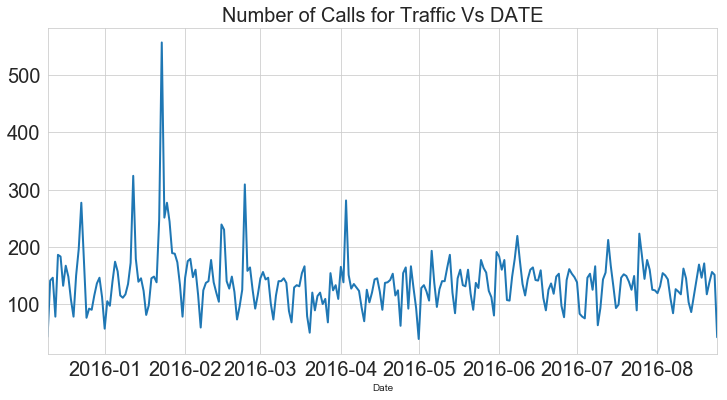

In [93]:
#Create a plot representing a Reason for the 911 Call
df[df['Reason']=='Traffic'].groupby('Date').count()['lat'].plot(lw=2,
                                                figsize=(12,6),
                                                fontsize =20)
plt.title('Number of Calls for Traffic Vs DATE',fontsize = 20)


Text(0.5, 1.0, 'Number of Calls for EMS Vs DATE')

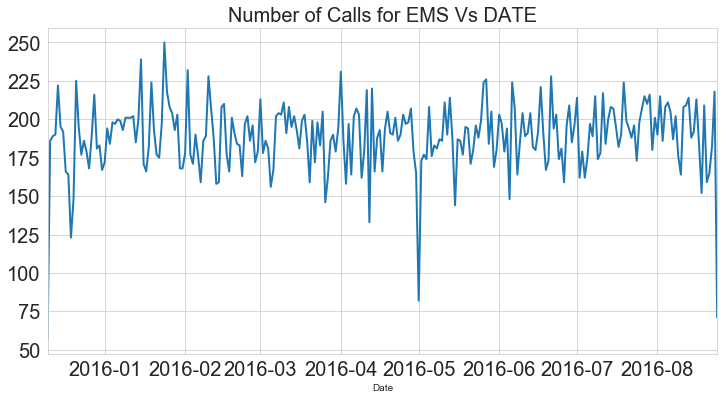

In [95]:
df[df['Reason']=='EMS'].groupby('Date').count()['lat'].plot(lw=2,
                                                figsize=(12,6),
                                                fontsize =20)
plt.title('Number of Calls for EMS Vs DATE',fontsize = 20)

Text(0.5, 1.0, 'Number of Calls for FIRE Vs DATE')

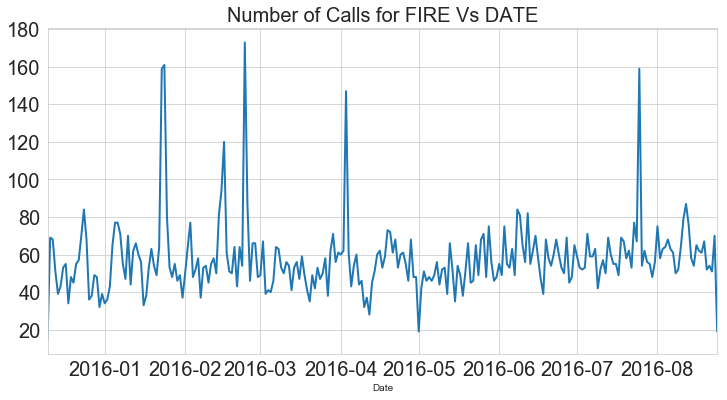

In [96]:
df[df['Reason']=='Fire'].groupby('Date').count()['lat'].plot(lw=2,
                                                figsize=(12,6),
                                                fontsize =20)
plt.title('Number of Calls for FIRE Vs DATE',fontsize = 20)

In [117]:
dayHour = df.groupby(by = ['Day of Week','Hour']).count()['Reason'].unstack()

In [118]:
dayHour

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
Tue,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
Wed,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335


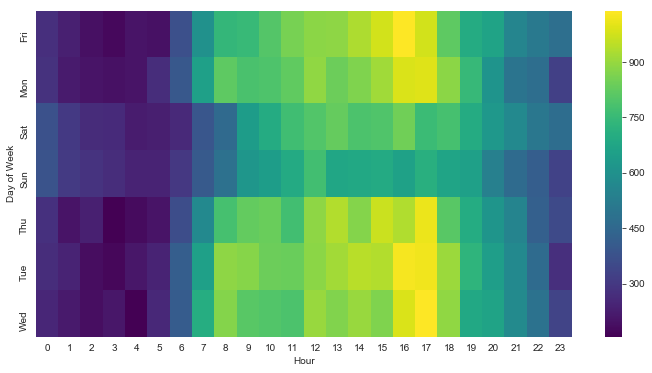

In [119]:
plt.figure(figsize = (12,6))
sns.heatmap(dayHour, cmap = 'viridis')

From the heatmap, we can conclude that the most number of calls were made
around 1700 hours. 

In [122]:
byMonth = df.groupby(by = ['Day of Week','Month']).count()['Reason'].unstack()
byMonth

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266
Tue,1973,1753,1884,1430,1918,1676,1670,1612,1234
Wed,1700,1903,1889,1517,1538,2058,1717,1295,1262


<Figure size 864x432 with 0 Axes>

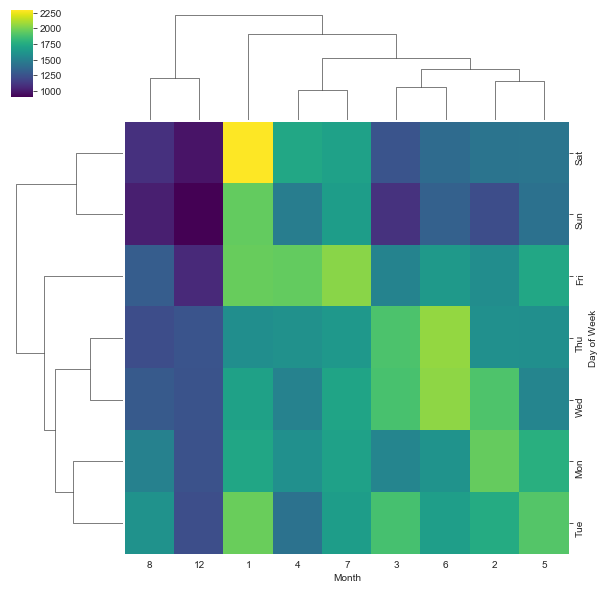

In [132]:
plt.figure(figsize = (12,6))
sns.clustermap(byMonth, cmap = 'viridis')